### 探索titanic乘客生还率相关因素

使用的数据集：   泰坦尼克号数据：titanic-data.csv
参考文档：  http://pandas.pydata.org/pandas-docs  http://matplotlib.org/api/pyplot_api.html

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as pyplot

titanic_data=pd.read_csv("C:\\Users\\89669\\Desktop\\udacity\\p2\\titanic-data.csv")

#### step1：清洗数据

In [2]:
titanic_data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


这个结果说明'Age','Cabin','Embarked'存在NA数据。'Cabin'列数据太少，可以直接去掉；'Age'可以填充均值,'Embarked'只有三种值类型，S最多，可以填充S对结果影响最小

In [3]:
titanic_data=titanic_data.drop('Cabin',axis=1)#去掉'Cabin'

In [4]:
titanic_data=titanic_data.fillna({'Age':titanic_data['Age'].mean(),'Embarked':'S'},inplace=True)

In [5]:
titanic_data['Age']=titanic_data['Age'].astype('int')#Age转换为整形数据

In [6]:
titanic_data.groupby(['Survived','Embarked']).size()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           219
dtype: int64

In [7]:
titanic_data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342


填充后的结果，已经去掉Cabin列，并且没有NA值

#### step2:数据分析

1. 首先分析生还率基本数据

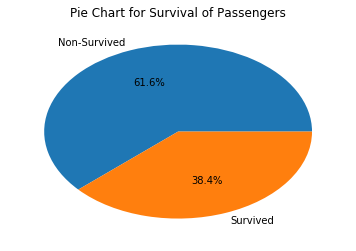

In [8]:
by_Survived = titanic_data.groupby(['Survived'])['Survived'].count()
pyplot.pie(by_Survived, labels = ['Non-Survived','Survived'], autopct='%.1f%%')
pyplot.title('Pie Chart for Survival of Passengers')
pyplot.show()

为了分析各个因素与生还率的关系，先声明画图函数。

画饼状图：

In [9]:
def draw_pie(feature):
    by_Survived = titanic_data.groupby([feature])[feature].count()
    print(by_Survived)
    pyplot.pie(by_Survived,autopct='%.1f%%')
    pyplot.title('Pie Chart for Survival of Passengers')
    pyplot.show()

画直方图（针对连续数据）：

In [48]:
def draw_hist(feature, bins=10):
    # group the dataset by Survives and feature
    grouped = [titanic_data[titanic_data.Survived == 0][feature], titanic_data[titanic_data.Survived == 1][feature]]
    pyplot.hist(grouped, bins=bins, stacked=True)
    pyplot.xlabel(feature)
    pyplot.ylabel('Frequency')
    pyplot.title("All Passenger Distribution By Survival and "+feature)
    pyplot.show()

画柱状图（针对离散数据）：

In [22]:
# 构建绘制人数的堆柱形图
def draw_bar(key):
    titanic_data.groupby([key,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
    pyplot.ylabel('Count')
    pyplot.title('Number of Survived Passenger Number by {}'.format(key))
    pyplot.show()

2.Age因素

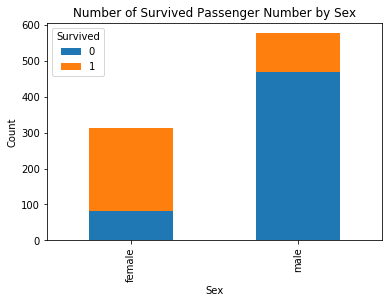

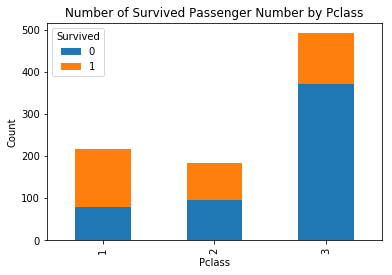

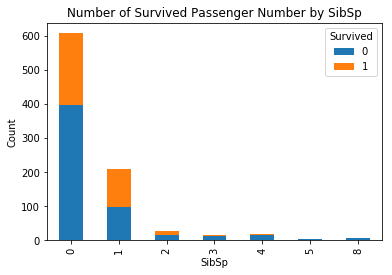

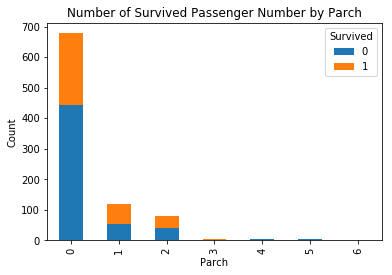

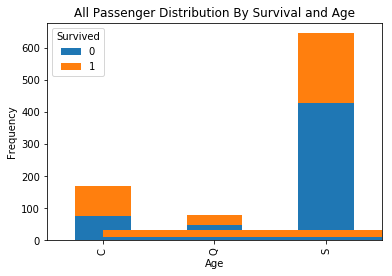

In [23]:
draw_hist('Age',bins=20)

In [24]:
titanic_data.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.240437,12.463835,1.0,23.0,29.0,35.0,74.0
1,342.0,28.426901,13.796348,0.0,21.0,29.0,35.0,80.0


结论：从分析数据看，生还人群的年龄分布和未生还人群年龄分布差不多，他们的均值，方差等等也没有显著差异。因此，年龄与生还率没有必然联系。

3.Sex因素

Sex
female    314
male      577
Name: Sex, dtype: int64


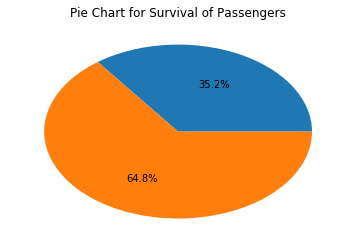

In [25]:
draw_pie('Sex')

In [26]:
titanic_data.groupby(['Survived','Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [29]:
# data=titanic_data.groupby(['Survived','Sex']).size()
# fig1 = pyplot.figure(2)
# rects =pyplot.bar(left = (0.5,1,1.5,2),height = data,width = 0.2,color=('r','g','r','g'),align="center",yerr=0.000001)
# pyplot.title('Age,Survived rate static')
# pyplot.xticks((0.5,1,1.5,2),('unSurvived female','unSurvived male','Survived female','Survived male'))
# pyplot.show()

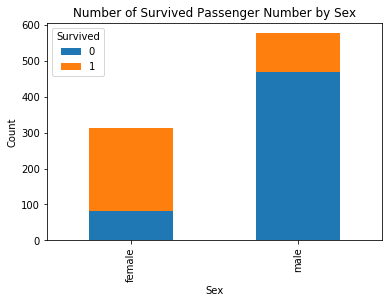

In [30]:
draw_bar("Sex")

结论：female人数少于male。female生还率明显高于male

4.Pclass因素

In [31]:
titanic_data.groupby(['Survived','Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


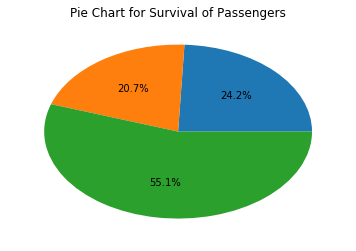

In [32]:
draw_pie('Pclass')

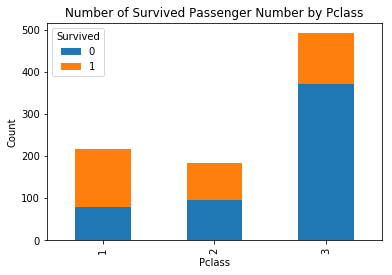

In [33]:
draw_bar("Pclass")

结论：Pclass=3人数最多，生还率最低。Pclass=2和Pclass=1人数相近，但是Pclass=1生还率要比Pclass=2高。

5.SibSp因素

In [34]:
titanic_data.groupby(['Survived','SibSp']).size()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
dtype: int64

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


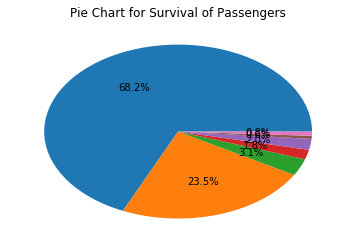

In [35]:
draw_pie('SibSp')

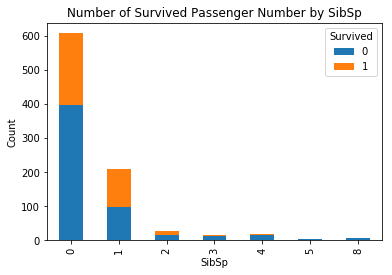

In [36]:
draw_bar("SibSp")

结论：大部分人属于SibSp=1和SibSp=2.SibSp=1占据绝大多数。SibSp=1的生还率低于SibSp=2

6.Parch因素

In [37]:
titanic_data.groupby(['Survived','Parch']).size()

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
dtype: int64

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


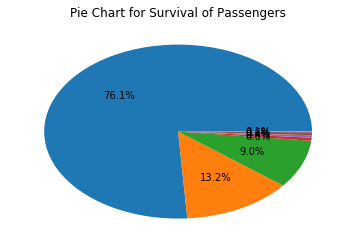

In [38]:
draw_pie('Parch')

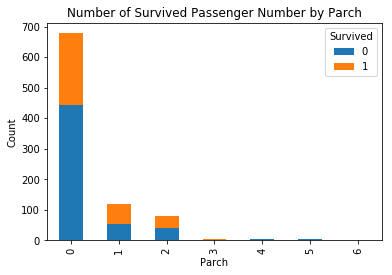

In [39]:
draw_bar("Parch")

结论：绝大多数人是Parch=1.少部分属于Parch=2和Parch=3.Parch>3的人很少。Parch=1的人生还率低于Parch=2和Parch=3的人

7.Fare因素

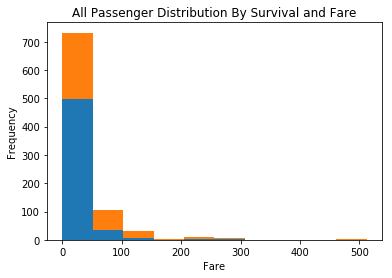

In [40]:
 draw_hist('Fare',bins=10)

In [41]:
titanic_data.groupby('Survived').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


结论：
1. 大部分人的Fare低于50.
2. Fare低于50的人群的生还率低于Fare大于50的人。
3. 生还者的Fare比未生还者要高，但是分布更分散。

8.Embarked因素

In [42]:
titanic_data.groupby(['Survived','Embarked']).size()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           219
dtype: int64

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64


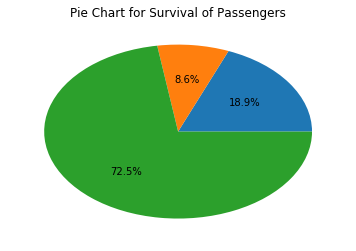

In [43]:
draw_pie('Embarked')

In [46]:
# Embarked_data=titanic_data.groupby(['Survived','Embarked']).size()
# fig1 = pyplot.figure(2)
# rects =pyplot.bar(left = (1,2,3,4,5,6),height = Embarked_data,width = 0.2,color=('r','g','b','r','g','b'),align="center",yerr=0.000001)
# pyplot.title('Embarked,Survived rate static')
# pyplot.xticks((1,2,3,4,5,6),('unSurvived C','unSurvived Q','unSurvived S','Survived C','Survived Q','Survived S'))
# pyplot.show()

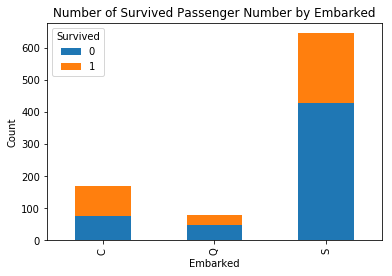

In [47]:
draw_bar("Embarked")

结论：
1. 大部分人属于Embarked=S,C其次，Q最少
2. Embarked=C生还率最高。Q其次，S最低

#### step3: 结论

1. 此次统计数据进来自于泰坦尼克号一艘船，仅能作为那个时代，某些人群的一个统计样本。
2. 这个统计样本大于总数为891，远大于30，具有统计意义。
3. 所采集的数据中，最显著影响生还率的是性别，female明显比male有更高的生还率。其他因素的相关性不是很明显。
4. Cabin由于数据太少而被剔除，无法判断其影响